In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Predicting temperature

In [2]:
import pandas as pd
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [13]:
X = weather_df[['Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]
y = weather_df["Temperature (C)"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [14]:
X_cons = sm.add_constant(X_train)
results = sm.OLS(y_train, X_cons).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:06:56   Log-Likelihood:            -2.2956e+05
No. Observations:               67517   AIC:                         4.591e+05
Df Residuals:                   67512   BIC:                         4.592e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     38.0255      0.276    137.747      0.000      37.484      38.567
Humidity                 -32.5815      0.146   -222.567      0.000     -32.868     -32.295
Wind Speed (km/h)         -0.1987      0.004    -47.722      0.000      -0.207      -0.191
Wind Bearing (degrees)     0.0041      0.000     15.550      0.000       0.004       0.005
Pressure (millibars)      -0.0008      0.000     -3.174      0.002      -0.001      -0.000
==============================================================================
Omnibus:                     2277.845   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2544.794
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       3.319   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
resudial = y_test-y_pred

## Multicolinearity Check


In [97]:
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({"vif":vif[0:]},index=X_train.columns).T

C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
vif,4.119166,7.478271,2.694006,7.493064,7.506434,6.038581,2.764584,4.393982,4.922146,4.475484,...,36.051985,14.967495,12.117574,52.22238,936.862112,329.194714,331.223971,50121.777174,1.793565,2.24616


**when vif score is bigger than 10 it means that there is an multicolinearity. Therefore the assumption is not satisifed.**

## normality test


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

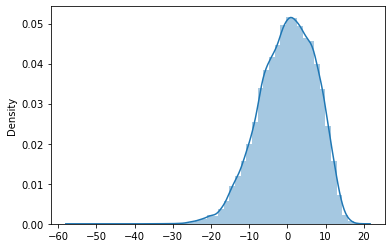

In [20]:
sns.distplot(resudial)

In [22]:
np.mean(resudial)

-0.029200588538193215

**normality of residuals is satisfied**

## Homoscedasticity


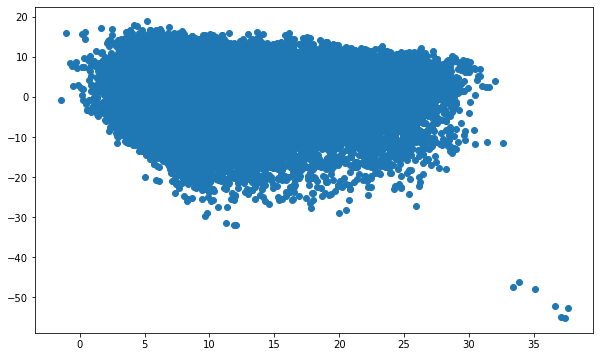

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred,resudial)

**most of residuals distributed over the zero. it means that there is no homoscedasticity**

## No autoCorrelation of residual


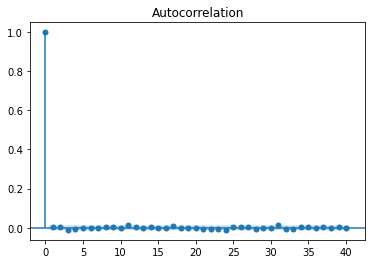

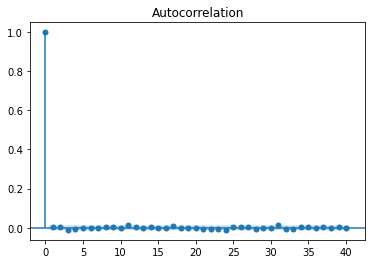

In [29]:
sm.graphics.tsa.plot_acf(resudial, lags=40, alpha=0.05)

 **most of resudials distributed over the zero. it means that there is no autocorrelation**

# 2. House prices

In [30]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
(house_prices_df.isnull().sum().sort_values(ascending=False)/len(house_prices_df)*100).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

In [46]:
miss_val_ind = (house_prices_df.isnull().sum().sort_values(ascending=False)/len(house_prices_df)*100).head(10).index

In [47]:
house_prices_df.drop(miss_val_ind[0:5],axis=1,inplace=True)

In [48]:
(house_prices_df.isnull().sum().sort_values(ascending=False)/len(house_prices_df)*100).head(10)

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
dtype: float64

In [50]:
house_prices_df["LotFrontage"].fillna(house_prices_df["LotFrontage"].mean(),inplace=True)

In [51]:
(house_prices_df.isnull().sum().sort_values(ascending=False)/len(house_prices_df)*100).head(10)

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
dtype: float64

In [52]:
house_prices_df.dropna(inplace=True)

In [56]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [61]:
obj_ind = house_prices_df.dtypes[house_prices_df.dtypes=="O"].index

In [64]:
for i in obj_ind:
    if house_prices_df[i].nunique()>5:
        house_prices_df.drop(i,axis=1,inplace=True)

**i drop the columns that has number of category that larger than 5.** 

In [65]:
house_prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,366,0,112,0,0,0,0,4,2010,142125


In [69]:
obj_ind = house_prices_df.dtypes[house_prices_df.dtypes=="O"]

In [79]:
corr_ind = house_prices_df.corr()["SalePrice"].sort_values(ascending=False).index

In [82]:
house_prices_df.drop(corr_ind[11:],axis=1,inplace=True)

In [83]:
house_prices_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
Name: SalePrice, dtype: float64

In [87]:
complet_df = pd.get_dummies(house_prices_df,drop_first=True)

In [89]:
complet_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,1,0,0,0,1,0,1
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,0,0,0,1,0,0,0,1,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,1,0,0,0,1,0,1
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,0,0,1,0,0,0,1,0,1
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,1,0,0,0,1,0,1


In [93]:
X = complet_df.drop("SalePrice",axis=1)
y = complet_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [95]:
X_cons = sm.add_constant(X_train)
results = sm.OLS(y_train, X_cons).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     109.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:09:26   Log-Likelihood:                -10829.
No. Observations:                 936   AIC:                         2.181e+04
Df Residuals:                     859   BIC:                         2.219e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.223e+05   1.59e+05     -3.925      0.000   -9.34e+05   -3.11e+05
OverallQual         8364.8186   1310.551      6.383      0.000    5792.562    1.09e+04
YearBuilt            176.3887     81.121      2.174      0.030      17.169     335.608
YearRemodAdd         259.8808     71.884      3.615      0.000     118.791     400.970
TotalBsmtSF           56.2628      6.198      9.078      0.000      44.098      68.427
1stFlrSF             -25.0535      6.315     -3.968      0.000     -37.447     -12.660
GrLivArea             82.8421      4.191     19.767      0.000      74.617      91.068
FullBath           -5499.8410   2599.133     -2.116      0.035   -1.06e+04    -398.446
TotRmsAbvGrd       -3273.2095   1149.882     -2.847      0.005   -5530.116   -1016.303
GarageCars          1784.8934   2999.860      0.595      0.552   -4103.019    7672.806
GarageArea            25.8092      9.968      2.589      0.010       6.245      45.373
MSZoning_FV         2.342e+04    1.7e+04      1.377      0.169   -9957.903    5.68e+04
MSZoning_RH         1.361e+04   1.94e+04      0.703      0.482   -2.44e+04    5.16e+04
MSZoning_RL         1.755e+04   1.63e+04      1.075      0.283   -1.45e+04    4.96e+04
MSZoning_RM         9668.7434   1.64e+04      0.588      0.557   -2.26e+04     4.2e+04
Street_Pave         1.141e+04   3.23e+04      0.353      0.724    -5.2e+04    7.48e+04
LotShape_IR2        7655.0169   5361.008      1.428      0.154   -2867.192    1.82e+04
LotShape_IR3         650.8620   1.14e+04      0.057      0.954   -2.17e+04     2.3e+04
LotShape_Reg       -1287.0996   2155.172     -0.597      0.551   -5517.118    2942.919
LandContour_HLS     4082.8692   7164.268      0.570      0.569   -9978.652    1.81e+04
LandContour_Low      -11.4627   8407.909     -0.001      0.999   -1.65e+04    1.65e+04
LandContour_Lvl      804.2517   5332.872      0.151      0.880   -9662.734    1.13e+04
Utilities_NoSeWa   -3.054e-10   2.17e-10     -1.408      0.159   -7.31e-10     1.2e-10
LotConfig_CulDSac   6386.3190   4182.985      1.527      0.127   -1823.749    1.46e+04
LotConfig_FR2       -1.11e+04   5579.143     -1.989      0.047    -2.2e+04    -145.427
LotConfig_FR3      -3680.9825   1.41e+04     -0.261      0.794   -3.13e+04     2.4e+04
LotConfig_Inside   -1493.0852   2421.736     -0.617      0.538   -6246.298    3260.127
LandSlope_Mod       5031.2784   5461.481      0.921      0.357   -5688.132    1.58e+04
LandSlope_Sev        353.2592   1.25e+04      0.028      0.978   -2.42e+04     2.5e+04
BldgType_2fmCon    -7375.3500   9319.684     -0.791      0.429   -2.57e+04    1.09e+04
BldgType_Duplex    -5.063e+04   7242.448     -6.991      0.000   -6.48e+04   -3.64e+04
BldgType_Twnhs     -1.495e+04   5818.061     -2.570      0.010   -2.64e+04   -3532.614
BldgType_TwnhsE    -1.097e+04   3890.5

In [96]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
resudial = y_test-y_pred

## Multicolinearity Check

In [98]:
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({"vif":vif[0:]},index=X_train.columns).T

C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
vif,4.119166,7.478271,2.694006,7.493064,7.506434,6.038581,2.764584,4.393982,4.922146,4.475484,...,36.051985,14.967495,12.117574,52.22238,936.862112,329.194714,331.223971,50121.777174,1.793565,2.24616


- **There are lots of feature that cause multicolinearity.**
- **we can use PCA to decrease the feature number**

## normality test

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

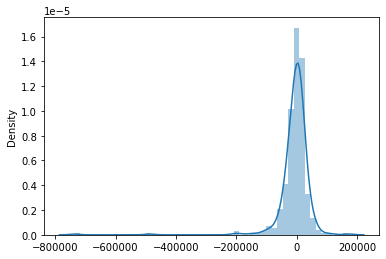

In [99]:
sns.distplot(resudial)

**we can say that it is normaly distributed.**

## Homoscedasticity


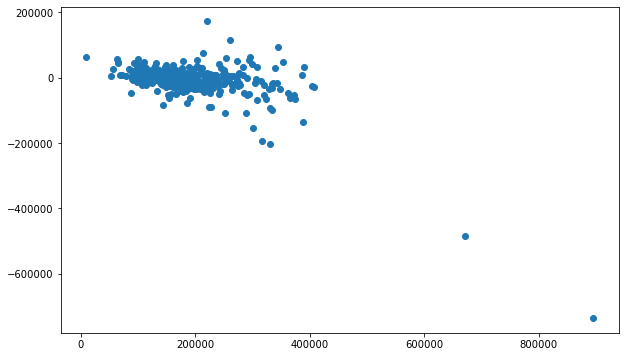

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred,resudial)

**Lots of data distributed around zero it means that there is no evidence that cause the homoscedasticity**

## No autoCorrelation of residual


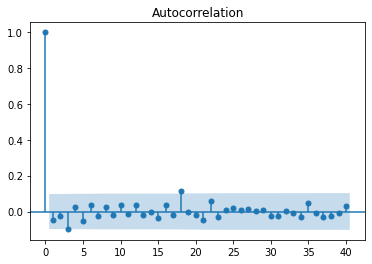

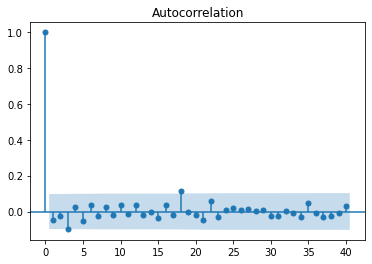

In [102]:
sm.graphics.tsa.plot_acf(resudial, lags=40, alpha=0.05)

**there is just one value that exceed the boundry**